# Figure S6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import scipy.stats as sp
import importlib
from matplotlib import patches

import replay_structure.metadata as meta
import replay_structure.read_write as read_write

In [2]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
summary_df = read_write.load_descriptive_stats(meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function)
behavior_paths, angular_distance = read_write.load_predictive_analysis(meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function, "viterbi")

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/predictive_analysis_4cm_3ms_poisson_viterbitrajectories.obj


In [4]:
legend_labels = {'trajectory_model': 'Trajectory model', 'map_classified_PF': 'Previously classified'}
tick_fontsize=5
map_classified = "map_classified_PF"

AWAY = GOAL


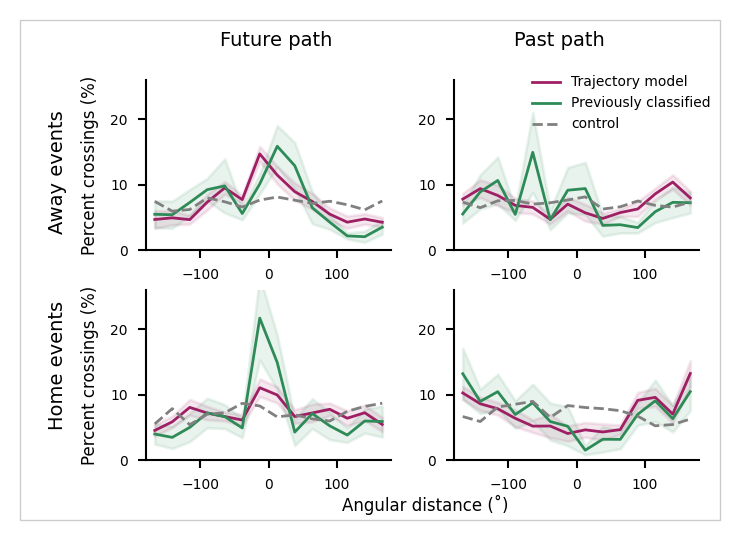

In [6]:
figure_width = 3.5
figure_height = 2.5

left_margin = 0.18
right_margin = 0.07
header_height = .05
footer_height = 0.12

w_spacing = 0.05
w_spacing = 0.09
h_spacing = 0.08

panel_width = .35
panel_height = .34

fig = plt.figure(
    figsize=(figure_width, figure_height), dpi=200, facecolor="w", edgecolor="k"
)
ax = dict()
top_row_panel_bottom = footer_height + panel_height + h_spacing
right_column_left = left_margin + panel_width + w_spacing

ax[0,0] = fig.add_axes([left_margin, top_row_panel_bottom, panel_width, panel_height])
ax[0,1] = fig.add_axes([right_column_left, top_row_panel_bottom, panel_width, panel_height])
ax[1,0] = fig.add_axes([left_margin, footer_height, panel_width, panel_height])
ax[1,1] = fig.add_axes([right_column_left, footer_height, panel_width, panel_height])

n_bins=15
angular_distance_hist = dict()

bins = np.linspace(-180,180,n_bins)
colors = {'map_classified_PF': 'seagreen', 'trajectory_model': '#9e1f63'}
edge_linewidth=3
x = bins[:-1] + np.diff(bins)/2


for trajectory_type in ['trajectory_model', 'map_classified_PF']:
    for behavior_path_type in ['past', 'future']:
        for location_type in ['home', 'away']:
            angular_distance_hist[trajectory_type, behavior_path_type, location_type] = np.zeros((8,n_bins-1))
            for i, session in enumerate(meta.Session_List):
                rat = session.rat
                day = session.day
                if location_type == 'home':
                    hist= np.histogram((angular_distance[behavior_path_type][(summary_df[trajectory_type]==True) & 
                                                                 (summary_df['current_location_type']=='home') & 
                                                                 (summary_df['rat']==rat) & 
                                                                 (summary_df['day']==day)]).flatten(), 
                                       bins=bins, density=True)
                elif location_type == 'away':
                    hist= np.histogram((angular_distance[behavior_path_type][(summary_df[trajectory_type]==True) & 
                                                                 (summary_df['current_location_type']=='goal') &
                                                                 (summary_df['rat']==rat) & 
                                                                 (summary_df['day']==day)]).flatten(), 
                                       bins=bins, density=True) 
                else: 
                    print('hi')
                angular_distance_hist[trajectory_type, behavior_path_type, location_type][i] = hist[0]/np.sum(hist[0])*100
            

            row = 0 if location_type == 'away' else 1
            col = 0 if behavior_path_type == 'future' else 1
            ax[row,col].plot(x, np.nanmean(angular_distance_hist[trajectory_type, behavior_path_type, location_type], axis=0), 
                         label=legend_labels[trajectory_type], color=colors[trajectory_type], linewidth=1)
            ax[row,col].fill_between(x, 
                                     np.nanmean(angular_distance_hist[trajectory_type, behavior_path_type, location_type], axis=0) - np.nanstd(angular_distance_hist[trajectory_type, behavior_path_type, location_type], axis=0)/np.sqrt(8), 
                                     np.nanmean(angular_distance_hist[trajectory_type, behavior_path_type, location_type], axis=0) + np.nanstd(angular_distance_hist[trajectory_type, behavior_path_type, location_type], axis=0)/np.sqrt(8),
                        color=colors[trajectory_type], alpha=.1, edgecolor='white')
        
           
             
hist= np.histogram((angular_distance['control_past'][(summary_df['current_location_type']!='home')]).flatten(), 
                    bins=bins, density=True)
ax[0,0].plot(x, hist[0]/np.sum(hist[0])*100, label='control', color='gray', linestyle='--', linewidth=1)
hist= np.histogram((angular_distance['control_future'][(summary_df['current_location_type']!='home')]).flatten(), 
                   bins=bins, density=True)
ax[0,1].plot(x, hist[0]/np.sum(hist[0])*100, label='control', color='gray', linestyle='--', linewidth=1)
hist= np.histogram((angular_distance['control_past'][(summary_df['current_location_type']=='home')]).flatten(), 
                   bins=bins, density=True)
ax[1,0].plot(x, hist[0]/np.sum(hist[0])*100, label='control', color='gray', linestyle='--', linewidth=1)
hist= np.histogram((angular_distance['control_future'][(summary_df['current_location_type']=='home')]).flatten(), 
                   bins=bins, density=True)
ax[1,1].plot(x, hist[0]/np.sum(hist[0])*100, label='control', color='gray', linestyle='--', linewidth=1)


for row in range(2):
    for col in range(2):
        ax[row,col].tick_params(direction='out', length=3, width=.75)
        ax[row,col].tick_params(axis='x', labelsize=tick_fontsize)
        ax[row,col].tick_params(axis='y', labelsize=tick_fontsize)
        ax[row,col].spines['top'].set_visible(False)
        ax[row,col].spines['right'].set_linewidth(False)
        ax[row,col].spines['bottom'].set_linewidth(.75)
        ax[row,col].spines['left'].set_linewidth(.75)
        ax[row,col].set_xlim([-180, 180])
        ax[row,col].set_xlim([-180,180])
        ax[row,col].set_ylim([0,26])
        ax[row,col].set_yticks(np.arange(0,26,10))

row = 0
col=1
ax[row,col].legend(frameon=False, fontsize=5, loc=1,bbox_to_anchor=(1.1,1.1,0,0))

ax[0,0].set_ylabel("Percent crossings (%)", fontsize=6)
ax[1,0].set_ylabel("Percent crossings (%)", fontsize=6)

ax[1,0].text(.8,-.3, "Angular distance (˚)", size=6, transform=ax[1,0].transAxes)


ax[1,0].text(-.4,1.35, "Away events", size=7, transform=ax[1,0].transAxes, rotation=90)
ax[1,0].text(-.4,.2, "Home events", size=7, transform=ax[1,0].transAxes, rotation=90)
ax[0,0].text(.3,1.2, "Future path", size=7, transform=ax[0,0].transAxes)
ax[0,0].text(1.5,1.2, "Past path", size=7, transform=ax[0,0].transAxes)

plt.savefig(os.path.join(meta.FIGURES_PATH, "FigureS6.svg"), dpi=500, transparent=True)

# visualize figure edge
rect = plt.Rectangle(
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

print("AWAY = GOAL")

plt.show()